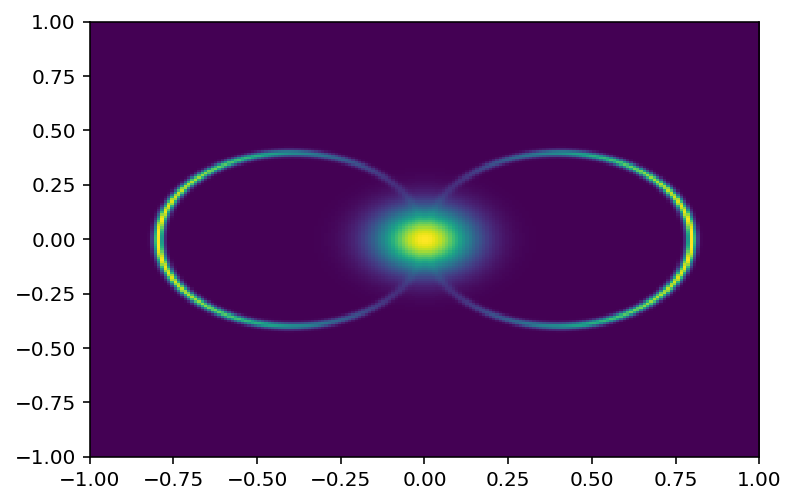

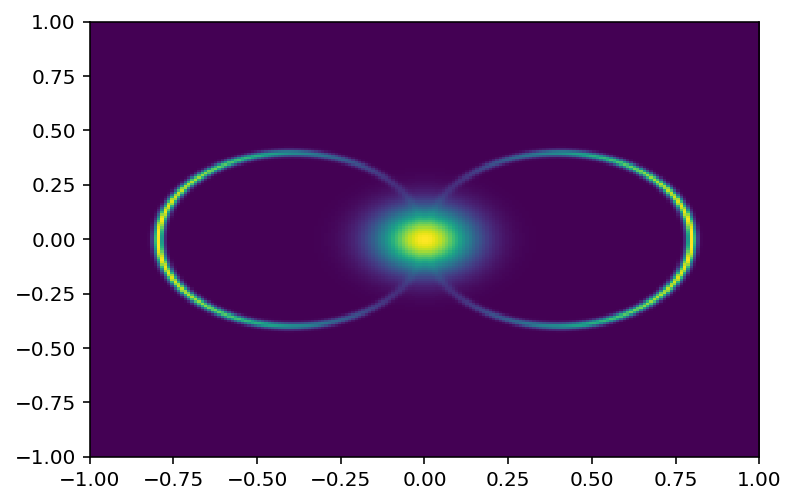

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

from scipy.special import erf
from scipy.stats import norm


def gau2(x, y, mx, my, sigma_x, sigma_y):
    return (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(-((x - mx) ** 2 / sigma_x ** 2 + (y - my) ** 2 / sigma_y ** 2) / 2)


def ring(x, y, cx, cy, sigma, r0):
    return norm.pdf(np.sqrt((x - cx) ** 2 + (y - cy) ** 2), r0, sigma) / (
        np.sqrt(sigma ** 2) * ((np.pi * r0 * erf(
                                 r0 / (np.sqrt(2) * sigma))) / sigma +
          np.sqrt(2 * np.pi) * np.exp(-(r0 ** 2 / (2. * sigma ** 2))) +
             np.pi * r0 * np.sqrt(1 / sigma ** 2)
         )
        )


def double_faded_ring_blob(x, y, sigma_ring=0.01, sigma_blob=0.1, ring_radius=0.4, 
                           fade_fraction=1.0):
    return (
        gau2(x, y, 0, 0, sigma_blob, sigma_blob) / 2 +
          (1 + fade_fraction *(x - ring_radius) / ring_radius) * ring(x, y,
             ring_radius, 0, sigma_ring, ring_radius) / 4
          +
          (1 - fade_fraction * (x + ring_radius) / ring_radius) * ring(x,
             y, -ring_radius, 0, sigma_ring, ring_radius) / 4
         )


def density_plot(x_test, y_test, z_test):
    ''' Plot the density map using nearest-neighbor interpolation '''
    # The imshow command below is more efficient than the pcolormesh call, however
    # in general is more efficient.
    # plt.pcolormesh(x_test, y_test, z_test)
    plt.imshow(z_test, 
               origin='lower', 
               extent=[np.min(x_test), np.max(x_test),
                                               np.min(y_test), np.max(y_test)], 
               aspect='auto')
    plt.show()


# Sample data
side_test = np.linspace(-1, 1, 200)
x_test, y_test = np.meshgrid(side_test, side_test)

z_test = double_faded_ring_blob(x_test, y_test)
density_plot(x_test, y_test, z_test)

z_test = double_faded_ring_blob(x_test, y_test, fade_fraction=0.)
density_plot(x_test, y_test, z_test)